Część 0 - przygotowanie danych

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

df = fetch_openml(data_id = 31)
X = df.data
y = df.target


c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [35]:
# Szukam kolumn, które da się uporządkować w kolejności - numerycznie
col = X.columns[X.apply(lambda col: col.astype(str).str.contains("<")).any()]
X[col]

,checking_status,savings_status,employment
0,<0,no known savings,>=7
1,0<=X<200,<100,1<=X<4
2,no checking,<100,4<=X<7
3,<0,<100,4<=X<7
4,<0,<100,1<=X<4
...,...,...,...
995,no checking,<100,4<=X<7
996,<0,<100,1<=X<4
997,no checking,<100,>=7
998,<0,<100,1<=X<4


In [23]:
# Sprawdzam, jak nazywają się kolumny, by pomóc w zamianie kolumn na numeryczne
X.employment.unique()
X.checking_status.unique()
X.savings_status.unique()

['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500']
Categories (5, object): ['100<=X<500', '500<=X<1000', '<100', '>=1000', 'no known savings']

In [3]:
X["employment"] = X["employment"].replace(['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'], list(range(0, 5))).astype("int")
X["checking_status"] = X["checking_status"].replace(['<0', '0<=X<200', '>=200'], list(range(0, 3)))
X["savings_status"] = X["savings_status"].replace(['no known savings', '<100','100<=X<500', '500<=X<1000', '>=1000'], list(range(0, 5))).astype("int")

C:\Users\wikto\AppData\Local\Temp\ipykernel_15060\4054405088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["employment"] = X["employment"].replace(['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'], list(range(0, 5))).astype("int")
C:\Users\wikto\AppData\Local\Temp\ipykernel_15060\4054405088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["checking_status"] = X["checking_status"].replace(['<0', '0<=X<200', '>=200'], list(range(0, 3)))
C:\Users\wikto\AppData\Local\Temp\ipykernel_15060\4054405088.p

In [37]:
# Sprawdzam, czy nie ma braków danych
X.isnull().values.any()

False

In [4]:
for i in X.select_dtypes(include=['category']).columns:
     X = pd.get_dummies(X, prefix=[i], columns=[i], drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.3)

Część pierwsza - Regresja logistyczna

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
lr = RandomizedSearchCV(LogisticRegression(penalty=None, max_iter=4000, ), {
    "C":uniform(loc=0, scale=1)
}, n_iter=20)

In [203]:
lr.fit(X_train, y_train)

c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\lin

RandomizedSearchCV(estimator=LogisticRegression(max_iter=4000, penalty=None),
                   n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F6F795BE80>})

In [126]:
lr.best_params_

{'C': 0.26061252865629236}

In [143]:
from sklearn.metrics import accuracy_score
y_pred_test = lr.predict(X_test)
np.round(accuracy_score(y_test, y_pred_test), 3)

0.733

In [160]:
# W późniejszych rozważaniach okazuje się, że jest to najlepsza dokładnośc, jaką udało się uzyskać dla regresuji logistycznej bez regularyzacji
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, auc
print("Dokładność na zbiorze treningowym:",np.round(accuracy_score(y_train, y_pred=lr.predict(X_train)), 3))
print("Dokładność na zbiorze testowym:", np.round(accuracy_score(y_test, y_pred=y_pred_test), 3))
print("Czułość:", np.round(recall_score(y_test, y_pred=y_pred_test, pos_label = 'good'), 3))
print("Precyzja:", np.round(precision_score(y_test, y_pred=y_pred_test, pos_label = 'good'), 3))
print("Wartość AUC:", np.round(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]), 3))

Dokładność na zbiorze treningowym: 0.817
Dokładność na zbiorze testowym: 0.733
Czułość: 0.824
Precyzja: 0.799
Wartość AUC: 0.766


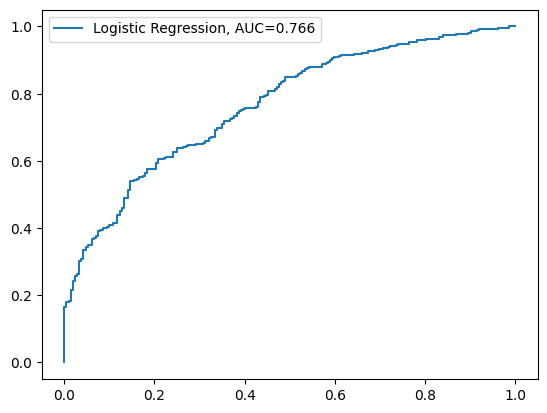

In [158]:
pred1 = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred1[:,1], pos_label="good")
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(round(roc_auc_score(y_test, pred1[:,1]), 3)))
plt.legend()

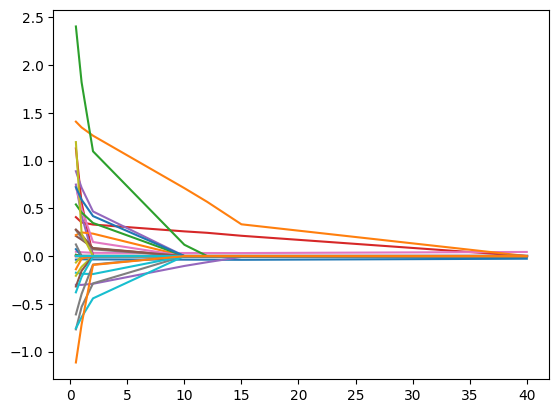

In [67]:
import matplotlib.pyplot as plt
coefs = []
intercepts = []
C = np.array([2, 1, 0.5, 0.1, 1/12, 1/15, 1/40])

for c in C:
    lm = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    lm.fit(X_train, y_train)
    coefs.append(lm.coef_[0])
    intercepts.append(lm.intercept_[0])

plt.plot(1/C, np.array(coefs), label = X.columns)

In [10]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(penalty = 'l1', C = 1/2, solver = 'liblinear')

In [11]:
lm.fit(X_train, y_train)
mostImportantColumns = (lm.coef_ != 0)

In [12]:
# Sprawdzam ile kolumn zostało wybranych jako te najważniejsze dla wartości C= 0.25
mostImportantColumns.sum()

25

In [16]:
from scipy.stats import uniform
X_trainLessCols = X_train.loc[:, mostImportantColumns[0]]
lr = RandomizedSearchCV(LogisticRegression(penalty=None, max_iter=4000, ), {
    "C":uniform(loc=0, scale=1)
}, n_iter=20)
lr = lr.fit(X_trainLessCols, y_train)

c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\lin

In [174]:
np.round(accuracy_score(y_test, lr.predict(X_test.loc[:, mostImportantColumns[0]])), 3)

0.72

Zatem nispecjalnie się opłaca obcinanie zmiennych dla regresji logistycznej bez regularyzacji.

In [190]:
lr = RandomizedSearchCV(LogisticRegression(penalty='l2', max_iter=4000, ), {
    "C":uniform(loc=0, scale=1),
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}, n_iter=40)
lrLessCols = lr.fit(X_trainLessCols, y_train)

c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\s

In [189]:
lrAllCols = RandomizedSearchCV(LogisticRegression(penalty='l2', max_iter=4000, ), {
    "C":uniform(loc=0, scale=1),
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}, n_iter=20).fit(X_train, y_train)

c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\s

In [191]:
# Zbudowaliśmy dwa modele w bliskim czasie (około 14 sekund), zatem porównamy ich dokładności
print("Dokładność przed obcięciem kolumn:", np.round(accuracy_score(y_test, lrAllCols.predict(X_test)), 3))
print("Dokładność po obcięciu kolumn:", np.round(accuracy_score(y_test, lrLessCols.predict(X_test.loc[:, mostImportantColumns[0]])), 3))

Dokładność przed obcięciem kolumn: 0.746
Dokładność po obcięciu kolumn: 0.733


Po obcięciu osiągamy słabsze wyniki niż przed.

In [192]:
y_pred_test = lrAllCols.predict(X_test)
print("Dokładność na zbiorze treningowym:",np.round(accuracy_score(y_train, y_pred=lrAllCols.predict(X_train)), 3))
print("Dokładność na zbiorze testowym:", np.round(accuracy_score(y_test, y_pred=y_pred_test), 3))
print("Czułość:", np.round(recall_score(y_test, y_pred=y_pred_test, pos_label = 'good'), 3))
print("Precyzja:", np.round(precision_score(y_test, y_pred=y_pred_test, pos_label = 'good'), 3))
print("Wartość AUC:", np.round(roc_auc_score(y_test, lrAllCols.predict_proba(X_test)[:, 1]), 3))

Dokładność na zbiorze treningowym: 0.8
Dokładność na zbiorze testowym: 0.746
Czułość: 0.861
Precyzja: 0.792
Wartość AUC: 0.776


In [24]:
from scipy.stats import uniform
lrAllColsl1 = RandomizedSearchCV(LogisticRegression(penalty='l1', max_iter=4000, ), {
    "C":uniform(loc=0, scale=1),
    "solver": ['liblinear','saga']
}, n_iter=20).fit(X_train, y_train)

c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\s

In [26]:
y_pred_test = lrAllColsl1.predict(X_test)
print("Dokładność na zbiorze treningowym:",np.round(accuracy_score(y_train, y_pred=lrAllColsl1.predict(X_train)), 3))
print("Dokładność na zbiorze testowym:", np.round(accuracy_score(y_test, y_pred=y_pred_test), 3))
print("Czułość:", np.round(recall_score(y_test, y_pred=y_pred_test, pos_label = 'good'), 3))
print("Precyzja:", np.round(precision_score(y_test, y_pred=y_pred_test, pos_label = 'good'), 3))
print("Wartość AUC:", np.round(roc_auc_score(y_test, lrAllColsl1.predict_proba(X_test)[:, 1]), 3))

Dokładność na zbiorze treningowym: 0.817
Dokładność na zbiorze testowym: 0.697
Czułość: 0.925
Precyzja: 0.715
Wartość AUC: 0.731


In [200]:
lrSomeColsl1 = RandomizedSearchCV(LogisticRegression(penalty='l1', max_iter=4000, ), {
    "C":uniform(loc=0, scale=1),
    "solver": ['liblinear','saga']
}, n_iter=27).fit(X_trainLessCols, y_train)

c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\wikto\anaconda3\envs\myenv\lib\site-packages\s

In [201]:
# Zbudowaliśmy dwa modele w bliskim czasie (około 15 sekund), zatem porównamy ich dokładności
print("Dokładność przed obcięciem kolumn:", np.round(accuracy_score(y_test, lrAllColsl1.predict(X_test)), 3))
print("Dokładność po obcięciu kolumn:", np.round(accuracy_score(y_test, lrSomeColsl1.predict(X_test.loc[:, mostImportantColumns[0]])), 3))

Dokładność przed obcięciem kolumn: 0.746
Dokładność po obcięciu kolumn: 0.727


Po obcięciu osiągamy słabsze wyniki niż przed.

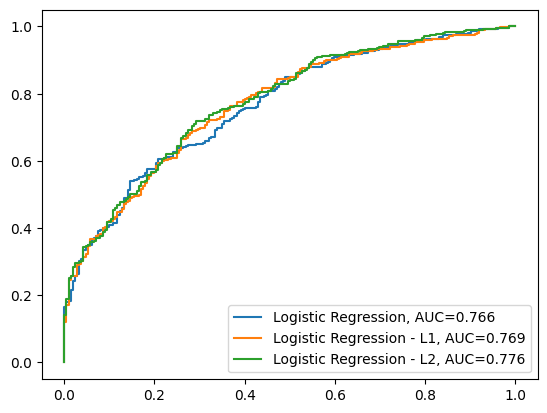

In [208]:
pred1 = lr.predict_proba(X_test)
pred2 = lrAllColsl1.predict_proba(X_test)
pred3 = lrAllCols.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred1[:,1], pos_label="good")
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(round(roc_auc_score(y_test, pred1[:,1]), 3)))
fpr, tpr, thresholds = roc_curve(y_test, pred2[:,1], pos_label="good")
plt.plot(fpr,tpr,label="Logistic Regression - L1, AUC="+str(round(roc_auc_score(y_test, pred2[:,1]), 3)))
fpr, tpr, thresholds = roc_curve(y_test, pred3[:,1], pos_label="good")
plt.plot(fpr,tpr,label="Logistic Regression - L2, AUC="+str(round(roc_auc_score(y_test, pred3[:,1]), 3)))
plt.legend()

Część druga - SVM

In [27]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(penalty = 'l1', C = 1/12, solver = 'liblinear')
lm.fit(X_train, y_train)
mostImportantColumns = (lm.coef_ != 0)
mostImportantColumns.sum()
X_train.loc[:, mostImportantColumns[0]].columns

Index(['duration', 'credit_amount', 'employment', 'age',
       'checking_status_no checking'],
      dtype='object')

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
X_trainLessCols = X_train.loc[:, mostImportantColumns[0]]
svm_linearLessCol = RandomizedSearchCV(SVC(probability=True), {
    "C":[0.001, 0.05, 0.01, 0.1, 1, 5,7, 10],
    "kernel":["linear", "sigmoid"],
}, n_iter=10)
svm_linearLessCol.fit(X_trainLessCols, y_train)

RandomizedSearchCV(estimator=SVC(probability=True),
                   param_distributions={'C': [0.001, 0.05, 0.01, 0.1, 1, 5, 7,
                                              10],
                                        'kernel': ['linear', 'sigmoid']})

In [17]:
svm_linearLessCol.best_params_

{'kernel': 'linear', 'C': 0.1}

In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, auc
y_pred_test = svm_linearLessCol.predict(X_test.loc[:, mostImportantColumns[0]])
print("Dokładność na zbiorze treningowym:",np.round(accuracy_score(y_train, y_pred=svm_linearLessCol.predict(X_train.loc[:, mostImportantColumns[0]])), 3))
print("Dokładność na zbiorze testowym:", np.round(accuracy_score(y_test, y_pred=y_pred_test), 3))
print("Czułość:", np.round(recall_score(y_test, y_pred=y_pred_test, pos_label = 'good'), 3))
print("Precyzja:", np.round(precision_score(y_test, y_pred=y_pred_test, pos_label = 'good'), 3))
print("Wartość AUC:", np.round(roc_auc_score(y_test, svm_linearLessCol.predict_proba(X_test.loc[:, mostImportantColumns[0]])[:, 1]), 3))

Dokładność na zbiorze treningowym: 0.787
Dokładność na zbiorze testowym: 0.701
Czułość: 0.929
Precyzja: 0.717
Wartość AUC: 0.696


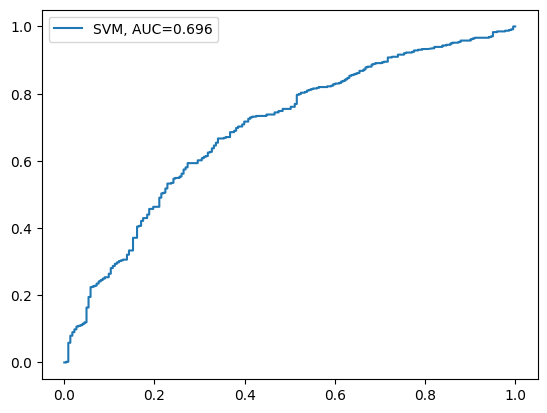

In [22]:
import matplotlib.pyplot as plt
pred = svm_linearLessCol.predict_proba(X_test.loc[:, mostImportantColumns[0]])
fpr, tpr, thresholds = roc_curve(y_test, pred[:,1], pos_label="good")
plt.plot(fpr,tpr,label="SVM, AUC="+str(round(roc_auc_score(y_test, pred[:,1]), 3)))
plt.legend()